In [1]:
# Import Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import bank file
df = pd.read_csv('C:\\Users\\Paul\\Dropbox (Personal)\\College\\Year2\\4CT5157\\Week1./bank.csv')

## 1. My Question Of Interest
> What insights can we gain from the previous and current campaigns for future campaigns?

In [3]:
# Calculate statistics for the numerical and categorical attributes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
age           1988 non-null float64
job           1990 non-null object
marital       2000 non-null object
education     1896 non-null object
default       2000 non-null object
balance       2000 non-null int64
housing       2000 non-null object
loan          2000 non-null object
contact       1809 non-null object
day           2000 non-null int64
month         2000 non-null object
duration      2000 non-null int64
campaign      2000 non-null int64
pdays         2000 non-null int64
previous      2000 non-null int64
poutcome      1546 non-null object
subscribed    2000 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [4]:
# I generated a statistical summary of the numerical attributes
df.dropna().describe()

,age,balance,day,duration,campaign,pdays,previous
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,42.204545,1462.069559,14.118457,276.633609,1.943526,217.366391,3.335399
std,12.334088,3346.727232,10.217403,208.165554,1.407710,106.653626,3.580295
min,19.000000,-980.000000,1.000000,7.000000,1.000000,1.000000,1.000000
25%,33.000000,208.750000,4.000000,135.000000,1.000000,177.000000,1.000000
50%,39.000000,558.500000,13.000000,224.500000,1.000000,199.000000,2.000000
75%,51.000000,1659.500000,25.000000,356.000000,2.000000,261.000000,4.000000
max,86.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


## 2. Conclusion
> There are 17 columns of data and 2000 rows.  Of the 17 columns, 7 are numerical and 10 are categorical.<br>
> The majority of columns contain 100% of their values (or close to), with the exception of 'poutcome' which has 1546 (77%),<br>
> 'contact' which has 1809 (90%) and 'education' which has 1896 (95%).<br>
> The difference between the mean and median for 'campaign' suggests that some customers were contacted many nore times<br>
> than the average 1 and for 'balance' suggest some customers have considerable large balances than the average 1413.<br>
> The attribute information in the the UCI repository does not match exactly:<br>
> 1. 'balance' is in the dataset but not decribed<br> (assume it means bank balance)<br>
> 2. 'day_of_week' is described but not in the dataset though we have 'day' (assume day is day of month)<br>
> 3. for 'pdays', 999 is supposed to mean the client wasn't previously contacted (assume -1 is the correct value)<br>
> 4. 'subscribed' is in the dataset but not described (assume this is described as y)

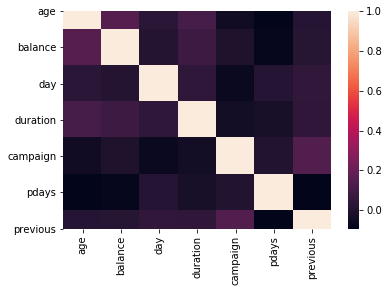

In [5]:
# Use at least two different plotting techniques to plot the distribution of some numerical attributes.
# First I used a heatmap to try and indentify and strong correlations between numbeical attributs
sns.heatmap(df.dropna().corr());

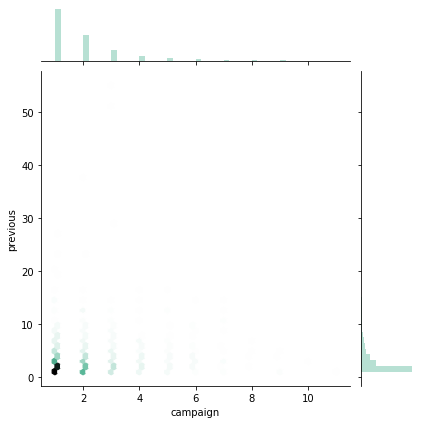

In [6]:
#Secondly, I used a jointplot of the 2 of the stronger correlating attributs ('campaign' and 'previous')
#with all rows with missing values removed
sns.jointplot(data=df.dropna(), x='campaign', y='previous', kind="hex", color="#4CB391")

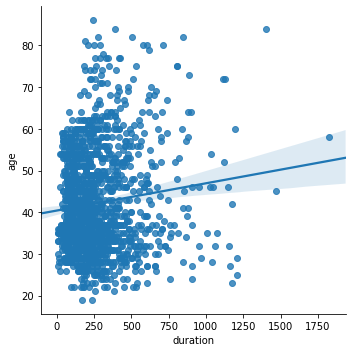

In [7]:
#Finally I used an lmplot of the 2 of the stronger correlating attributs ('duration' and 'age')
#with all rows with missing values removed
sns.lmplot(x='duration', y='age', data=df.dropna())

## 3. Conclusion
> There are no strong correlations between the numerical attributes in the dataset<br>
> Interesting that the customers that were not contacted previously have had a low number of contacts on this campaign

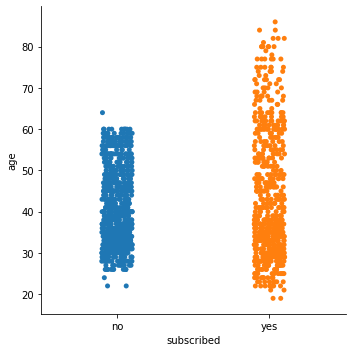

In [8]:
#Generate two plots with the combined distribution of attributes
#My first graph is a catplot showing 'age' against 'subscribed'
#with all rows with missing values removed
sns.catplot(x='subscribed', y='age', data=df.dropna())

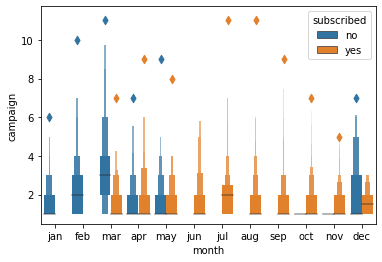

In [9]:
#My second graph is a boxenplot showing 'campaign' against 'month' split by 'subscribed' and ordered by 'month'
rank = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
sns.boxenplot(x="month", y="campaign", hue="subscribed",
               order=rank,
               data=df)

In [10]:
# a pivot table showing % of successful and unsuccessful loans ('Loan_Status') per number of 'Dependents'
pd.pivot_table(df.dropna(), values='balance', columns=['poutcome','subscribed'],index=['housing','loan'],aggfunc=len)

poutcome     failure        other       success       
subscribed        no    yes    no   yes      no    yes
housing loan                                          
no      no     145.0  104.0   8.0  84.0     4.0  305.0
        yes     52.0    5.0   2.0   2.0     NaN    8.0
yes     no     429.0   41.0  18.0  14.0     5.0   81.0
        yes    125.0    4.0   7.0   1.0     NaN    8.0

## 4. Conclusion
> Most customers over 60 that were asked, subscribed<br>
> Most customers that signed up to previous campaigns, signed up to the new campaign<br>
> Customers with no personal and housing loans were more likely to subscribe that those with loans<br>
> The best months for successful subsribers were Jun-Nov, the worst were Jan & Feb<br>
> Most customer made a decision to subsribe or not after 1-2 calls<br>

